### Sliding Puzzle

&nbsp;

Sliding puzzle is a fun game. 

&nbsp;


In [1]:
import copy
import matplotlib.pyplot as plt
import matplotlib.animation as pltani
import os
os.chdir('h:/')

In [2]:
#initial status
sliding_puzzle_init=[[5,8,2],[7,0,3],[1,4,6]]

#desired result
sliding_puzzle_final=[[1,2,3],[4,5,6],[7,8,0]]

In [3]:
#find next possible moves and append to queue
def check_around(current,row_id,col_id,visited,queue,pred):

    #avoid left most
    #move left tile to the right
    if col_id!=0:
        sliding_puzzle_next=copy.deepcopy(current)
        exchange=sliding_puzzle_next[row_id][col_id-1]
        sliding_puzzle_next[row_id][col_id]=exchange
        sliding_puzzle_next[row_id][col_id-1]=0
        
        #visit each status once
        #convert to string to store in dict
        if sliding_puzzle_next not in visited and sliding_puzzle_next not in queue:
            queue.append(sliding_puzzle_next)
            pred[''.join([str(j) for i in sliding_puzzle_next for j in i])]=current

    #avoid right most
    #move right tile to the left
    if col_id!=len(current[0])-1:
        sliding_puzzle_next=copy.deepcopy(current)
        exchange=sliding_puzzle_next[row_id][col_id+1]
        sliding_puzzle_next[row_id][col_id]=exchange
        sliding_puzzle_next[row_id][col_id+1]=0
        
        #visit each status once
        #convert to string to store in dict
        if sliding_puzzle_next not in visited and sliding_puzzle_next not in queue:
            queue.append(sliding_puzzle_next)
            pred[''.join([str(j) for i in sliding_puzzle_next for j in i])]=current

    #avoid top most
    #move top tile down
    if row_id!=0:
        sliding_puzzle_next=copy.deepcopy(current)
        exchange=sliding_puzzle_next[row_id-1][col_id]
        sliding_puzzle_next[row_id][col_id]=exchange
        sliding_puzzle_next[row_id-1][col_id]=0
        
        #visit each status once
        #convert to string to store in dict
        if sliding_puzzle_next not in visited and sliding_puzzle_next not in queue:
            queue.append(sliding_puzzle_next)
            pred[''.join([str(j) for i in sliding_puzzle_next for j in i])]=current

    #avoid bottom most
    #move bottom tile up
    if row_id!=len(current)-1:
        sliding_puzzle_next=copy.deepcopy(current)
        exchange=sliding_puzzle_next[row_id+1][col_id]
        sliding_puzzle_next[row_id][col_id]=exchange
        sliding_puzzle_next[row_id+1][col_id]=0
        
        #visit each status once
        #convert to string to store in dict
        if sliding_puzzle_next not in visited and sliding_puzzle_next not in queue:
            queue.append(sliding_puzzle_next)
            pred[''.join([str(j) for i in sliding_puzzle_next for j in i])]=current
            
    return queue,pred

In [4]:
#solve sliding puzzle problem via bfs
#details of bfs can be found in the following link
# https://github.com/je-suis-tm/graph-theory/blob/master/BFS%20DFS%20on%20DCG.ipynb
def sliding_puzzle(sliding_puzzle_init,sliding_puzzle_final):

    #initialize
    start=sliding_puzzle_init
    stop=False

    #create a queue with rule of first-in-first-out
    queue=[]
    queue.append(start)
    visited=[]

    #pred keeps track of how we get to the current vertex
    pred={}

    #bfs
    while not stop:

        #keep track of the visited vertices
        current=queue.pop(0)
        visited.append(current)

        #locate the sliding tile
        row_id=current.index([i for i in current if 0 in i][0])
        col_id=current[row_id].index(0)

        #target reached
        if current==sliding_puzzle_final:
            stop=True

        #find next status
        else:
            queue,pred=check_around(current,row_id,col_id,visited,queue,pred)    

        #impossible to reach target
        if len(queue)==0:
            stop=True

    #create the path by backtracking
    #trace the predecessor vertex from end to start
    previous=''.join([str(j) for i in sliding_puzzle_final for j in i])
    path=[]
    while pred:
        path.insert(0, previous)
        if previous==''.join([str(j) for i in start for j in i]):
            break
        previous=''.join([str(j) for i in pred[previous] for j in i])

    return len(path)-1,path

In [5]:
#create animation for sliding
def draw_sliding_puzzle(step,*args):

    ax,row_num,col_num,path=args
    ax.clear()
    ax.axis('off')
    
    #viz tiles
    for row_id in range(row_num):
        for col_id in range(col_num):
            ax.plot([col_id-0.5,col_id-0.5,col_id+0.5,col_id+0.5,col_id-0.5,],
                    [-row_id-0.5,-row_id+0.5,-row_id+0.5,-row_id-0.5,-row_id-0.5,],c='k')
            if path[step][row_id*col_num+col_id]!='0':        
                ax.text(col_id,-row_id,path[step][row_id*col_num+col_id],
                        ha='center',va='center',fontsize=20)
            else:
                ax.fill_between([col_id-0.5,col_id+0.5,],[-row_id+0.5,-row_id+0.5],
                                [-row_id-0.5,-row_id-0.5],color='cyan')

In [6]:
#use bfs to get path
num_of_steps,path=sliding_puzzle(sliding_puzzle_init,sliding_puzzle_final)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


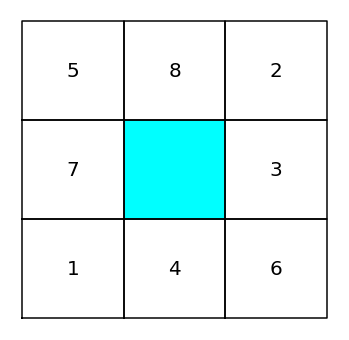

In [7]:
#viz
row_num=len(sliding_puzzle_init)
col_num=len(sliding_puzzle_init[0])
fig,ax=plt.subplots(figsize=(row_num*2,col_num*2))

ax.set_xlim(-1,col_num)
ax.set_ylim(-row_num-1,0)
ax.axis('off')

#create animations
anim=pltani.FuncAnimation(fig,draw_sliding_puzzle,
                          frames=len(path),
                          interval=900,
                          fargs=(ax,row_num,col_num,path))
anim.save('sliding puzzle.gif')